# Importing

In [17]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

# Data

In [18]:
data_train = pd.read_csv('./data/insurance_train_data.csv')
data_test = pd.read_csv('./data/insurance_test_data_version2.csv')

# Exploring data

In [44]:
data_train.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,.,1143,1
7,H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,.,1160,1
8,H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.0,0,V,N,O,R,520.0,1,2011.0,2,1224,0


In [45]:
data_train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6658.000000,7160.000000
mean,2013.670112,0.909864,0.305726,1883.727530,2.186034,1964.450285,0.231145
std,1.383902,0.239628,0.460747,2278.157745,0.940632,35.989880,0.421595
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


# Traitement

In [46]:
data_train["Building_Painted"].replace({"N":1, "V":0}, inplace=True)

data_train["Building_Fenced"].replace({"N":1, "V":0}, inplace=True)

data_train["Garden"].replace({"V":1, "O":0}, inplace=True)

data_train["Settlement"].replace({"R":1, "U":0}, inplace=True)

In [47]:
data_train["NumberOfWindows"].value_counts()

.       3542
4        940
3        850
5        639
2        364
6        306
7        212
8        116
1         75
>=10      66
9         50
Name: NumberOfWindows, dtype: int64

In [48]:
data_train["NumberOfWindows"].replace({
    ".":0,
    "1":1,
    "2":2,
    "3":3,
    "4":4,
    "5":5,
    "6":6,
    "7":7,
    "8":8,
    "9":9,
    ">=10":10}, inplace=True)

In [181]:
#NumberOfWindows_mean = data_train.loc[data_train["NumberOfWindows"]!=0, "NumberOfWindows"].mean()
NumberOfWindows_mean = 4.33

In [49]:
data_train.loc[data_train["NumberOfWindows"]==0, "NumberOfWindows"] = data_train.loc[data_train["NumberOfWindows"]!=0, "NumberOfWindows"].mean()

In [56]:
data_train["NumberOfWindows"].value_counts()

4.330017     3542
4.000000      940
3.000000      850
5.000000      639
2.000000      364
6.000000      306
7.000000      212
8.000000      116
1.000000       75
10.000000      66
9.000000       50
Name: NumberOfWindows, dtype: int64

In [50]:
data_train["Geo_Code"].value_counts()

6088     143
33063    137
6083     113
13206     98
31555     87
        ... 
59650      1
59656      1
60057      1
60172      1
2B353      1
Name: Geo_Code, Length: 1307, dtype: int64

In [53]:
data_train["Geo_Code"].value_counts().to_dict()

for key, value in data_train["Geo_Code"].value_counts().to_dict().items():
    if value < 30:
        data_train.loc[data_train["Geo_Code"] == key, "Geo_Code"] = "rare"
    elif value > 30 and value < 100:
        data_train.loc[data_train["Geo_Code"] == key, "Geo_Code"] = "common"
    else:
        data_train.loc[data_train["Geo_Code"] == key, "Geo_Code"] = "frequent"

In [ ]:
for key, value in data_train["Building Dimension"].value_counts().to_dict().items():
    if key < 100 :
        print(key, value)

In [74]:
data_train["Building Dimension"] = pd.read_csv('./data/insurance_train_data.csv')["Building Dimension"]

In [94]:
data_train['Insured_Period'] = data_train['Insured_Period'].map(lambda x: '1_year' if x == 1 else 'less_than_year')

data_train['Insured_Period'] = data_train['Insured_Period'].astype('object')

In [95]:
data_train["Insured_Period"].value_counts()

1_year            5319
less_than_year    1834
Name: Insured_Period, dtype: int64

In [123]:
print("< 1500 : ", len(data_train.loc[data_train["Building Dimension"] < 1500, "Building Dimension"].to_dict()))
print("between 1500, 4000 : ", len(data_train.loc[(data_train["Building Dimension"] > 1500) & (data_train["Building Dimension"] < 4000), "Building Dimension"]))
print("> 4000 : ", len(data_train.loc[data_train["Building Dimension"] > 4000, "Building Dimension"].to_dict()))

< 1500 :  4300
between 1500, 4000 :  1983
> 4000 :  800


In [124]:
data_train["Building Dimension"] = data_train["Building Dimension"].map(
    lambda x: 'small' if x < 1500 else 'medium' if x > 4000 else 'large'
)

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Density plot of Building Dimension')
plt.xlabel('Building Dimension')
plt.ylabel('Density')
plt.xlim(0,10000)

data_train['Building Dimension'].plot(kind='density', linewidth=2)
plt.show()

# Visualization

In [126]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7153 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7153 non-null   object 
 1   YearOfObservation   7153 non-null   int64  
 2   Insured_Period      7153 non-null   object 
 3   Residential         7153 non-null   int64  
 4   Building_Painted    7153 non-null   int64  
 5   Building_Fenced     7153 non-null   int64  
 6   Garden              7153 non-null   float64
 7   Settlement          7153 non-null   int64  
 8   Building Dimension  7153 non-null   object 
 9   Building_Type       7153 non-null   int64  
 10  Date_of_Occupancy   7153 non-null   float64
 11  NumberOfWindows     7153 non-null   float64
 12  Geo_Code            7153 non-null   object 
 13  Claim               7153 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 838.2+ KB


Visualizing Customer Id of type int/object


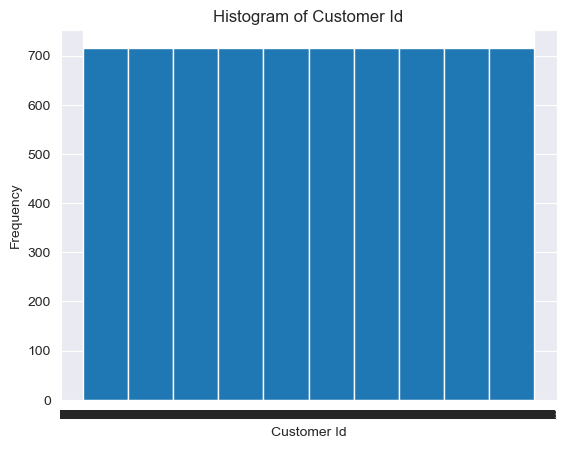

Visualizing YearOfObservation of type int/object


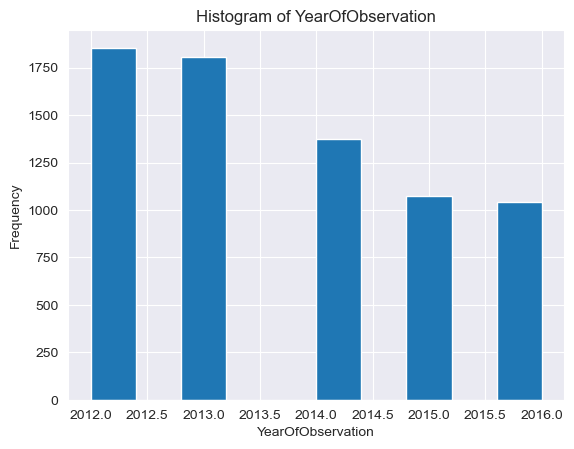

Visualizing Insured_Period of type int/object


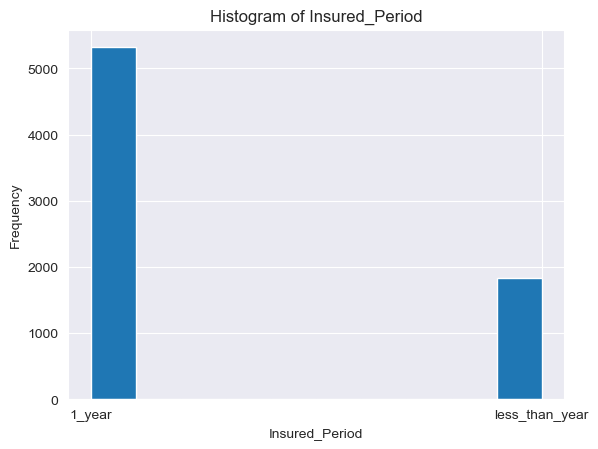

Visualizing Residential of type int/object


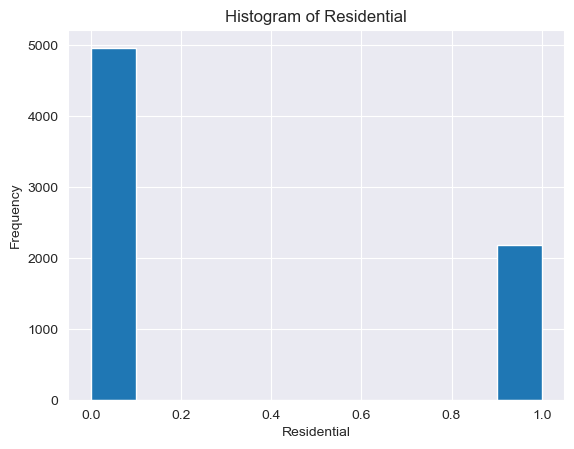

Visualizing Building_Painted of type int/object


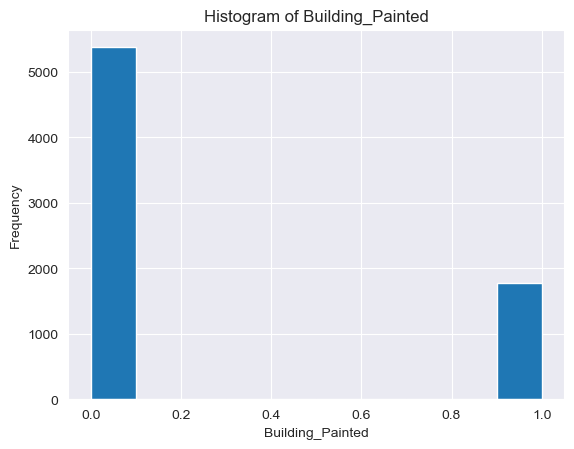

Visualizing Building_Fenced of type int/object


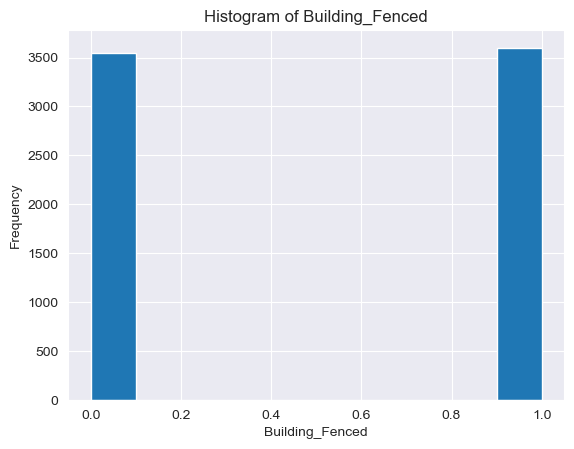

Visualizing Garden of type float


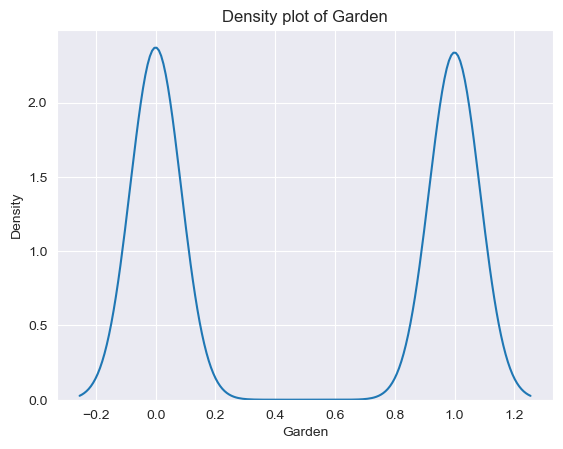

Visualizing Settlement of type int/object


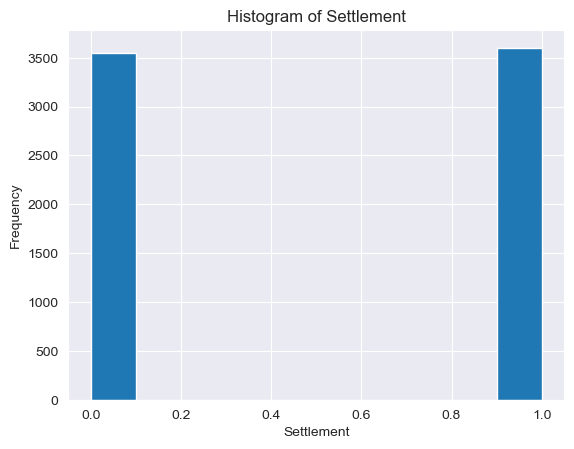

Visualizing Building Dimension of type int/object


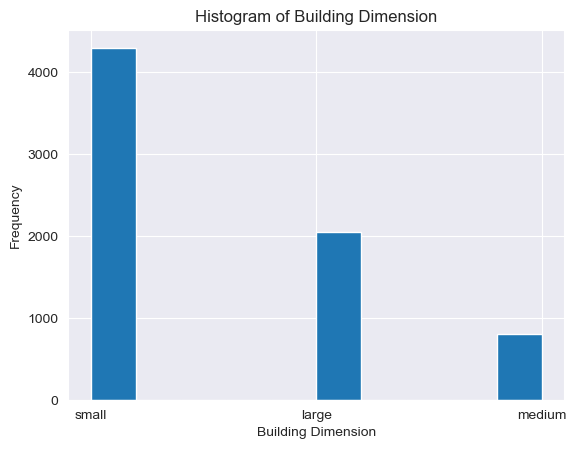

Visualizing Building_Type of type int/object


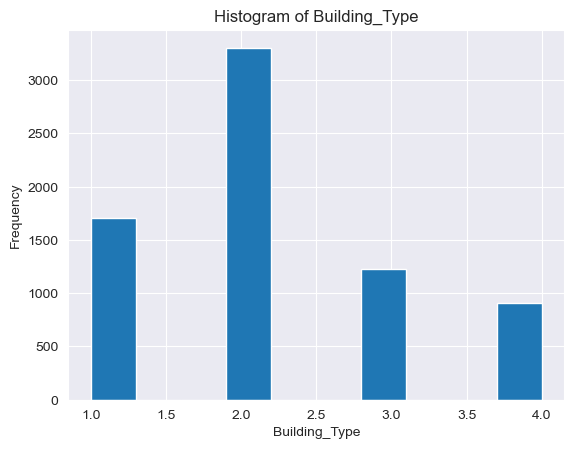

Visualizing Date_of_Occupancy of type float


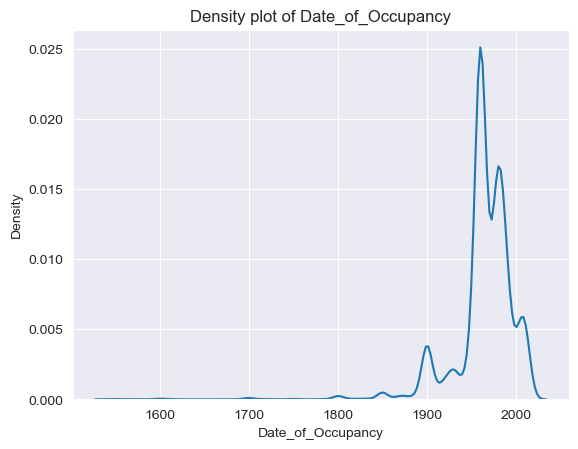

Visualizing NumberOfWindows of type float


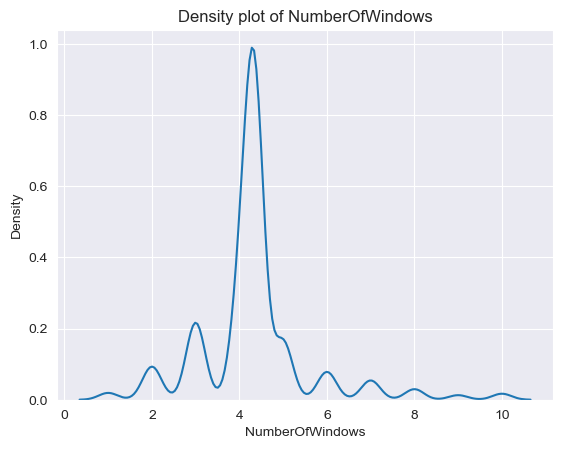

Visualizing Geo_Code of type int/object


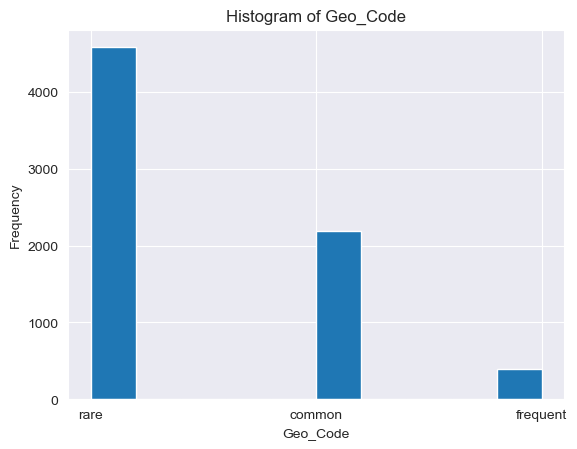

Visualizing Claim of type int/object


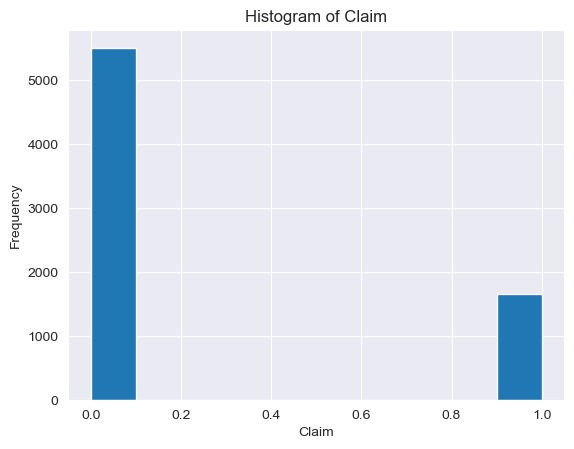

In [128]:
import seaborn as sns

for col in data_train.columns:
    if data_train[col].dtype == 'int64' or data_train[col].dtype == 'object':
        print("Visualizing " + col + " of type int/object")
        plt.hist(data_train[col])
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    elif data_train[col].dtype == 'float64':
        print("Visualizing " + col+ " of type float")
        sns.kdeplot(data=data_train[col])
        plt.title(f'Density plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()

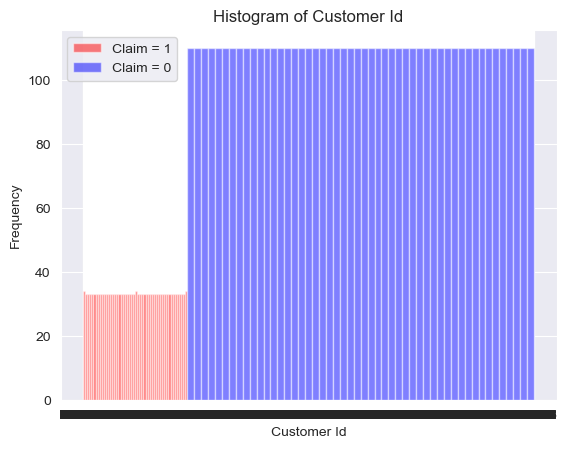

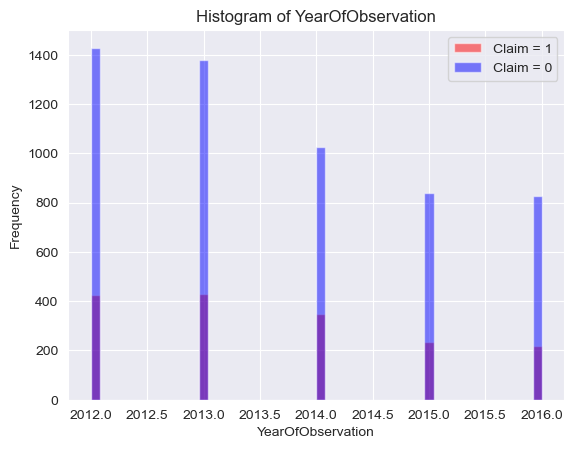

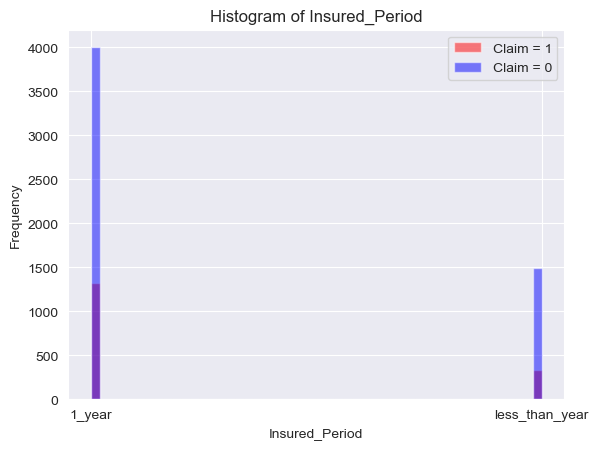

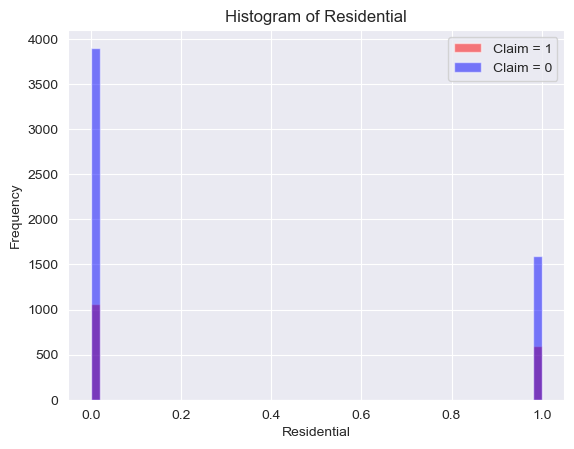

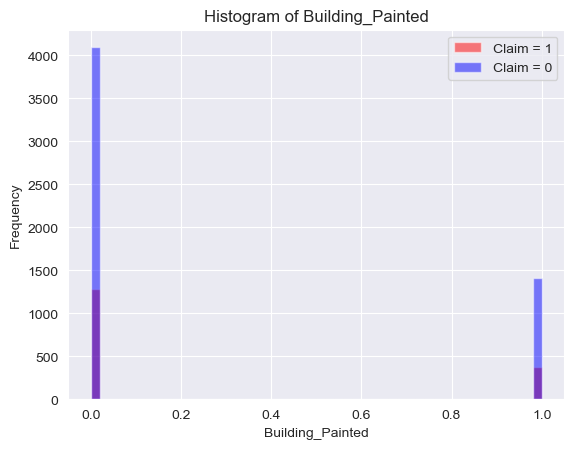

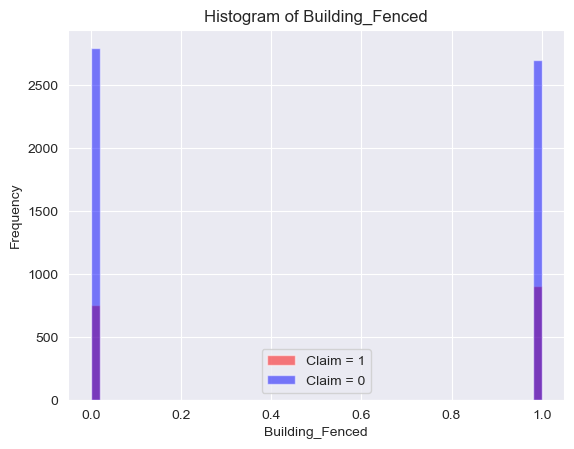

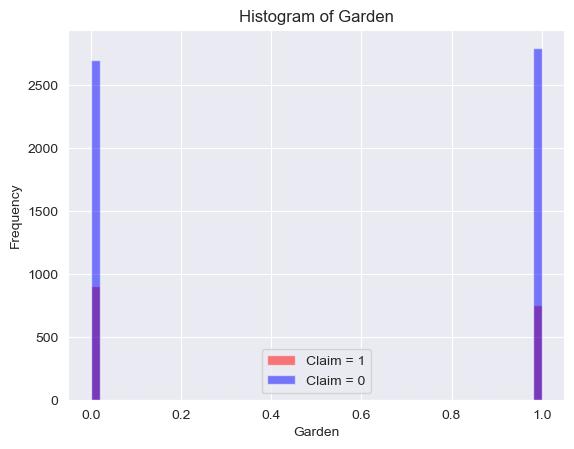

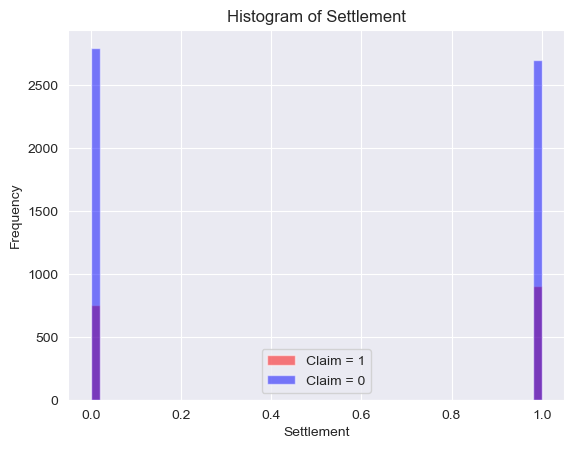

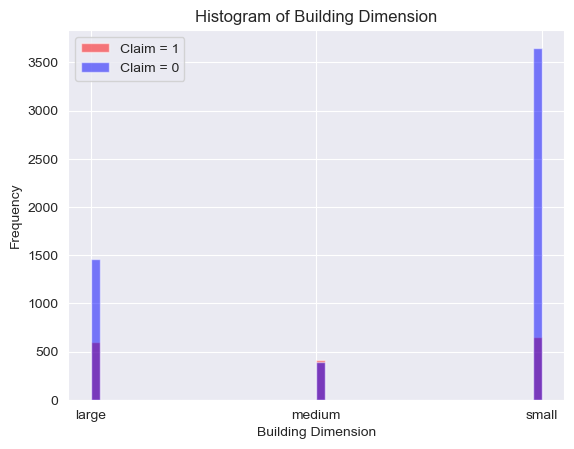

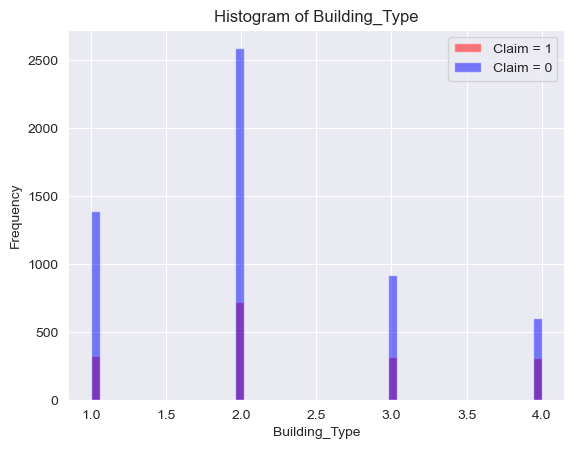

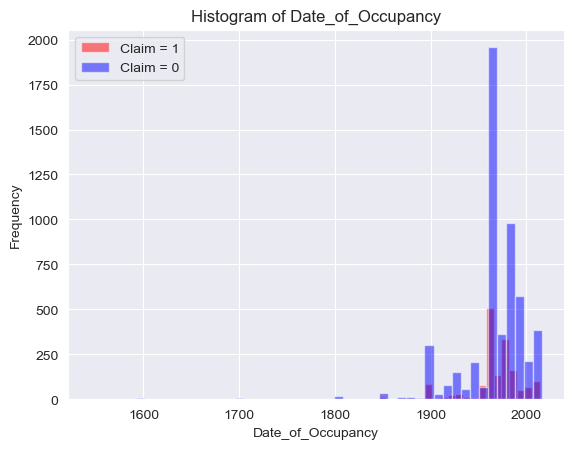

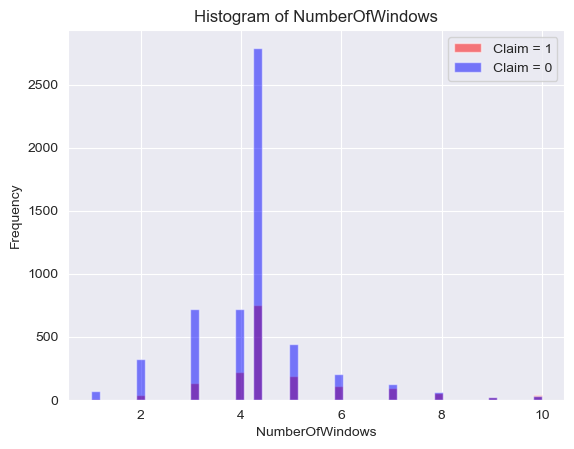

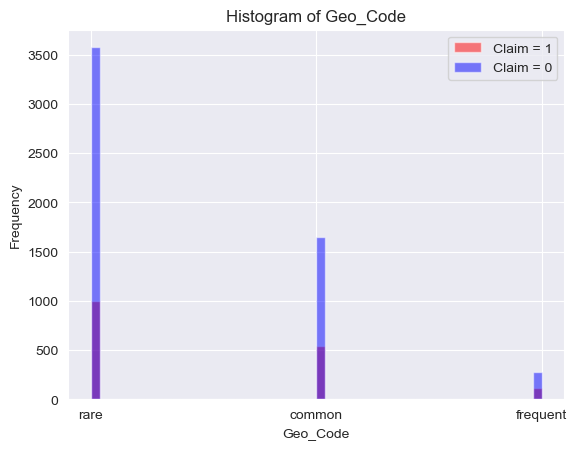

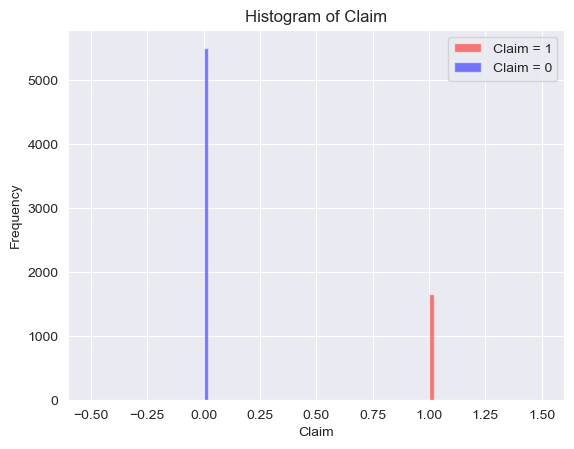

In [131]:
%matplotlib inline

for column in data_train.columns:
    fig, ax = plt.subplots()
    
    values_1 = data_train.loc[data_train['Claim'] == 1, column]
    values_0 = data_train.loc[data_train['Claim'] == 0, column]
    
    ax.hist(values_1, bins=50, alpha=0.5, color='red', label='Claim = 1')
    ax.hist(values_0, bins=50, alpha=0.5, color='blue', label='Claim = 0')
    
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    
    ax.legend()
    
    plt.show()

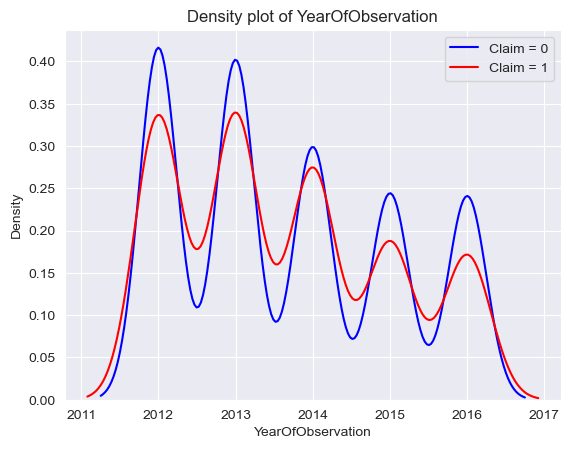

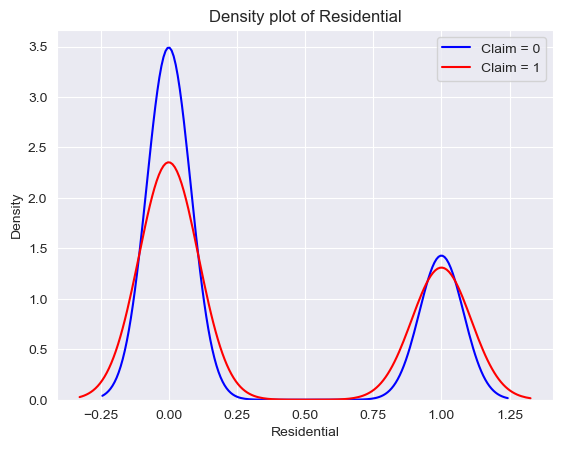

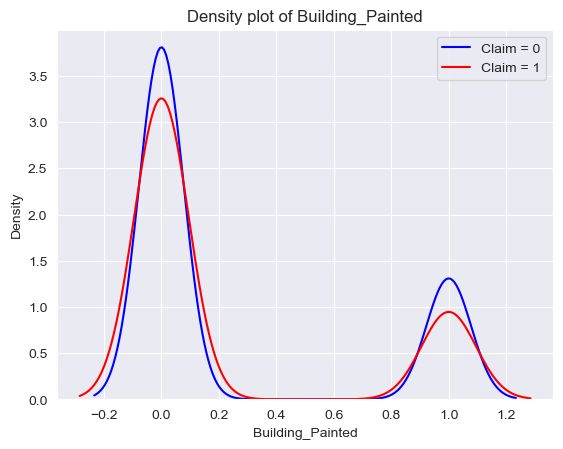

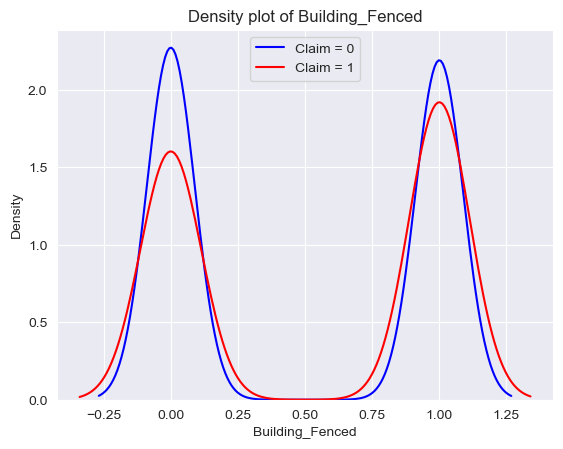

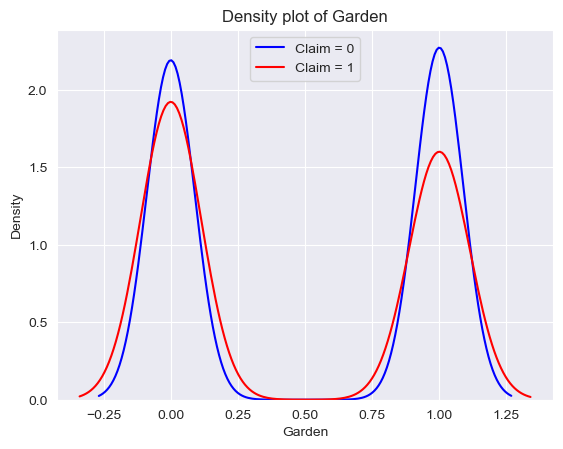

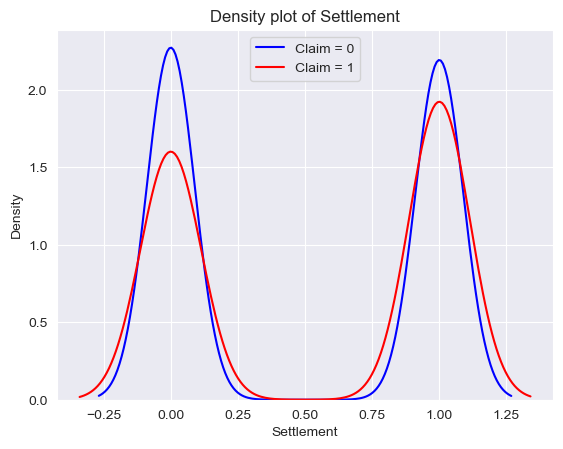

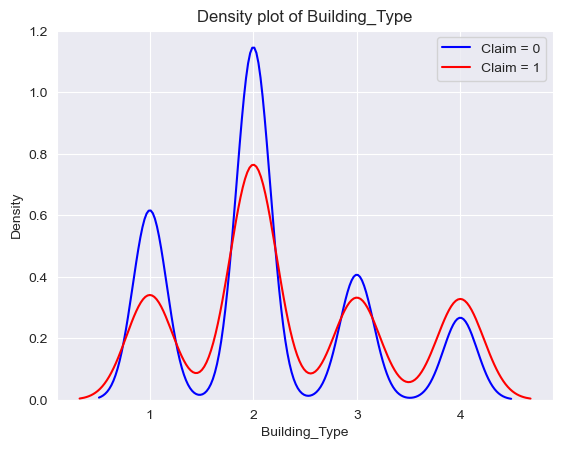

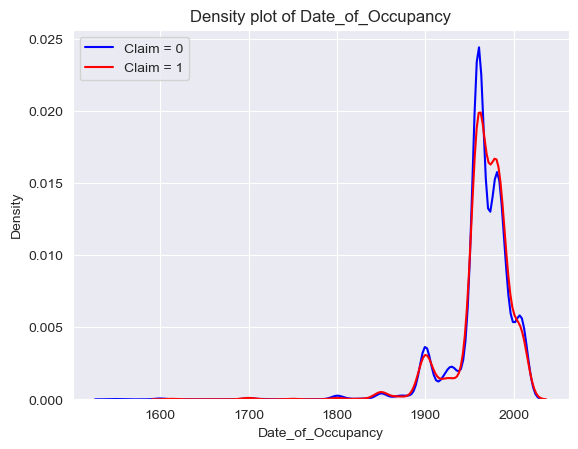

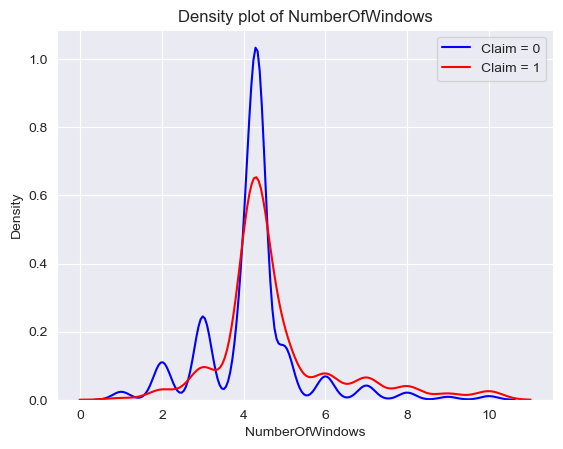

C:\Users\PCPRODZ\AppData\Local\Temp\ipykernel_768\1831602287.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_claim_0[column], color='blue', label='Claim = 0')
C:\Users\PCPRODZ\AppData\Local\Temp\ipykernel_768\1831602287.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_claim_1[column], color='red', label='Claim = 1')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


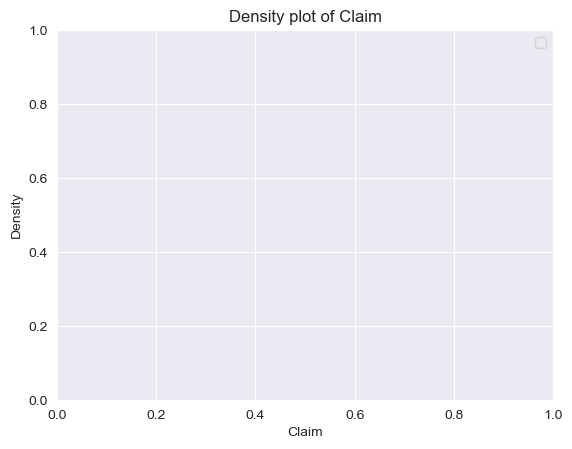

In [134]:
import seaborn as sns

for column in data_train.select_dtypes(exclude=['object']):

    df_claim_0 = data_train[data_train['Claim'] == 0]
    df_claim_1 = data_train[data_train['Claim'] == 1]

    sns.kdeplot(data=df_claim_0[column], color='blue', label='Claim = 0')
    sns.kdeplot(data=df_claim_1[column], color='red', label='Claim = 1')

    plt.title(f'Density plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

    plt.legend()

    plt.show()


# Feature cleaning

In [81]:
data_train.shape

(7160, 14)

In [86]:
data_train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy     502
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [83]:
data_train.dropna(subset=['Garden'], inplace=True)

In [85]:
data_train['Building Dimension'].fillna(data_train['Building Dimension'].mean(), inplace=True)


In [90]:
mode_geo_code = data_train['Geo_Code'].mode()[0]
data_train['Geo_Code'].fillna(mode_geo_code, inplace=True)

In [91]:
most_common_date = data_train['Date_of_Occupancy'].mode()[0]
data_train['Date_of_Occupancy'] = data_train['Date_of_Occupancy'].fillna(most_common_date)

In [187]:
print(most_common_date)

1960.0


In [152]:
data_train['Date_of_Occupancy'] = pd.read_csv('./data/insurance_train_data.csv')['Date_of_Occupancy']

date_of_occupancy_dict =  data_train['Date_of_Occupancy'].value_counts().to_dict()

In [154]:
from collections import OrderedDict

date_of_occupancy_dict = OrderedDict(sorted(date_of_occupancy_dict.items()))

date_of_occupancy_dict


OrderedDict([(1545.0, 1),
             (1550.0, 1),
             (1600.0, 5),
             (1613.0, 1),
             (1700.0, 10),
             (1718.0, 2),
             (1750.0, 3),
             (1780.0, 1),
             (1800.0, 24),
             (1810.0, 3),
             (1820.0, 1),
             (1824.0, 1),
             (1830.0, 4),
             (1840.0, 1),
             (1846.0, 1),
             (1850.0, 49),
             (1860.0, 3),
             (1864.0, 1),
             (1870.0, 17),
             (1871.0, 2),
             (1875.0, 4),
             (1880.0, 10),
             (1884.0, 1),
             (1890.0, 16),
             (1893.0, 2),
             (1895.0, 4),
             (1896.0, 3),
             (1898.0, 4),
             (1900.0, 371),
             (1901.0, 3),
             (1902.0, 1),
             (1903.0, 2),
             (1904.0, 5),
             (1905.0, 1),
             (1906.0, 1),
             (1907.0, 3),
             (1908.0, 1),
             (1910.0, 28),
   

In [155]:
data_train['Date_of_Occupancy'] = data_train['Date_of_Occupancy'].map(
    lambda x: 'before_1900' if x < 1900 else '1900-1950' if x < 1950 else '1950-1980' if x < 1980 else '1980-2000' if x < 2000 else 'after_2000' )

# Categorical

In [ ]:
data_train.info()

In [15]:
data_train['Building_Type'] = data_train['Building_Type'].astype(str)

categorical_cols = data_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data_train.select_dtypes(exclude=['object']).columns.tolist()

categorical_cols.remove('Customer Id')

categorical_cols, numerical_cols

NameError: name 'data_train' is not defined

In [158]:
data_train_encoded = pd.concat([data_train["Customer Id"], pd.get_dummies(data_train[categorical_cols]), data_train[numerical_cols]], axis=1)

data_train_encoded.columns

Index(['Customer Id', 'Insured_Period_1_year', 'Insured_Period_less_than_year',
       'Building Dimension_large', 'Building Dimension_medium',
       'Building Dimension_small', 'Building_Type_1', 'Building_Type_2',
       'Building_Type_3', 'Building_Type_4', 'Date_of_Occupancy_1900-1950',
       'Date_of_Occupancy_1950-1980', 'Date_of_Occupancy_1980-2000',
       'Date_of_Occupancy_after_2000', 'Date_of_Occupancy_before_1900',
       'Geo_Code_common', 'Geo_Code_frequent', 'Geo_Code_rare',
       'YearOfObservation', 'Residential', 'Building_Painted',
       'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Claim'],
      dtype='object')

# Feature selection

In [159]:
data_train_encoded.columns

Index(['Customer Id', 'Insured_Period_1_year', 'Insured_Period_less_than_year',
       'Building Dimension_large', 'Building Dimension_medium',
       'Building Dimension_small', 'Building_Type_1', 'Building_Type_2',
       'Building_Type_3', 'Building_Type_4', 'Date_of_Occupancy_1900-1950',
       'Date_of_Occupancy_1950-1980', 'Date_of_Occupancy_1980-2000',
       'Date_of_Occupancy_after_2000', 'Date_of_Occupancy_before_1900',
       'Geo_Code_common', 'Geo_Code_frequent', 'Geo_Code_rare',
       'YearOfObservation', 'Residential', 'Building_Painted',
       'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Claim'],
      dtype='object')

In [160]:
data_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7153 entries, 0 to 7159
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Id                    7153 non-null   object 
 1   Insured_Period_1_year          7153 non-null   uint8  
 2   Insured_Period_less_than_year  7153 non-null   uint8  
 3   Building Dimension_large       7153 non-null   uint8  
 4   Building Dimension_medium      7153 non-null   uint8  
 5   Building Dimension_small       7153 non-null   uint8  
 6   Building_Type_1                7153 non-null   uint8  
 7   Building_Type_2                7153 non-null   uint8  
 8   Building_Type_3                7153 non-null   uint8  
 9   Building_Type_4                7153 non-null   uint8  
 10  Date_of_Occupancy_1900-1950    7153 non-null   uint8  
 11  Date_of_Occupancy_1950-1980    7153 non-null   uint8  
 12  Date_of_Occupancy_1980-2000    7153 non-null   u

In [161]:
from sklearn.feature_selection import mutual_info_classif

feature_cols = [col for col in data_train_encoded.columns if ( col != 'Claim' and col != 'Customer Id' )]

mutual_info = mutual_info_classif(data_train_encoded[feature_cols], data_train['Claim'])

mi_tuples = list(zip(feature_cols, mutual_info))

mi_tuples_sorted = sorted(mi_tuples, key=lambda x: x[1], reverse=True)

for col, mi_score in mi_tuples_sorted:
    print(f"{col}: {mi_score}")

Building Dimension_small: 0.031753556785641956
Building Dimension_medium: 0.026824463503388074
NumberOfWindows: 0.014101562354604802
Residential: 0.009024946689755176
Building_Type_4: 0.0066127597903360424
Date_of_Occupancy_1950-1980: 0.006094512829217136
Geo_Code_rare: 0.0034926776199186715
YearOfObservation: 0.0032742617954306663
Building_Fenced: 0.0015014723884041459
Geo_Code_common: 0.0007209428202765711
Building_Type_2: 0.00015746698369500933
Geo_Code_frequent: 4.174949114665871e-05
Insured_Period_1_year: 0.0
Insured_Period_less_than_year: 0.0
Building Dimension_large: 0.0
Building_Type_1: 0.0
Building_Type_3: 0.0
Date_of_Occupancy_1900-1950: 0.0
Date_of_Occupancy_1980-2000: 0.0
Date_of_Occupancy_after_2000: 0.0
Date_of_Occupancy_before_1900: 0.0
Building_Painted: 0.0
Garden: 0.0
Settlement: 0.0


In [162]:
X = data_train_encoded.drop(["Claim"], axis=1)
y = data_train_encoded["Claim"]

In [163]:
X.describe()

,Insured_Period_1_year,Insured_Period_less_than_year,Building Dimension_large,Building Dimension_medium,Building Dimension_small,Building_Type_1,Building_Type_2,Building_Type_3,Building_Type_4,Date_of_Occupancy_1900-1950,...,Geo_Code_common,Geo_Code_frequent,Geo_Code_rare,YearOfObservation,Residential,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows
count,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000,...,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000
mean,0.743604,0.256396,0.287012,0.111841,0.601146,0.239061,0.462044,0.171816,0.127080,0.112820,...,0.305187,0.054942,0.639871,2013.670628,0.305886,0.248567,0.503425,0.496435,0.503705,4.330340
std,0.436673,0.436673,0.452399,0.315193,0.489697,0.426540,0.498592,0.377247,0.333085,0.316395,...,0.460519,0.227883,0.480071,1.384134,0.460814,0.432212,0.500023,0.500022,0.500021,1.286285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2013.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.330017
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,2015.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4.330017
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [164]:
X_train = X.copy()

In [165]:
X_train["NumberOfWindows"] = X["NumberOfWindows"] / 10

X_train["YearOfObservation"] = ( X["YearOfObservation"] - X["YearOfObservation"].min()) / (X["YearOfObservation"].max() - X["YearOfObservation"].min())

In [170]:
X_train.drop("Customer Id", axis=1, inplace=True)

# Ready data

In [3]:
data = pd.read_csv('./to_colab.csv')
data

,Insured_Period_1_year,Insured_Period_less_than_year,Building Dimension_large,Building Dimension_medium,Building Dimension_small,Building_Type_1,Building_Type_2,Building_Type_3,Building_Type_4,Date_of_Occupancy_1900-1950,...,Geo_Code_frequent,Geo_Code_rare,YearOfObservation,Residential,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows,Claim
0,1,0,0,0,1,1,0,0,0,0,...,0,1,0.25,0,1,0,1.0,0,0.433002,0
1,1,0,0,0,1,1,0,0,0,0,...,0,1,0.75,0,0,1,0.0,1,0.400000,0
2,1,0,0,0,1,1,0,0,0,0,...,0,1,0.50,0,1,0,1.0,0,0.433002,0
3,1,0,1,0,0,1,0,0,0,0,...,0,1,0.25,0,0,0,1.0,0,0.433002,0
4,1,0,0,0,1,1,0,0,0,0,...,0,1,0.50,0,0,1,0.0,1,0.300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,1,0,1,0,0,1,0,0,0,0,...,0,1,0.00,1,0,0,1.0,0,0.433002,0
7149,1,0,1,0,0,0,1,0,0,0,...,0,1,0.25,0,0,0,1.0,0,0.433002,1
7150,0,1,1,0,0,1,0,0,0,0,...,0,1,1.00,0,0,0,1.0,0,0.433002,0
7151,1,0,1,0,0,1,0,0,0,0,...,0,1,0.25,0,0,0,1.0,0,0.433002,0


In [4]:
X_ready = data.drop('Claim', axis=1)
y_ready = data['Claim']

# Model

In [5]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X_ready, y_ready)

In [6]:
X_resampled.shape, y_resampled.shape

((11000, 24), (11000,))

In [7]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_jobs=-1, seed=42)

param_grid = {
    'max_depth': [10, 20],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [200, 500],
}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    xgb_model, 
    param_grid, 
    cv=cv, 
    scoring='roc_auc', 
    n_jobs=-1, 
    verbose=1
)

grid_search.fit(X_resampled, y_resampled)


print("Best parameters: ", grid_search.best_params_)
print("Best score: ROC", grid_search.best_score_)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best parameters:  {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500}
Best score: ROC 0.849753652892562


In [8]:
model = grid_search.best_estimator_

In [10]:
probas = model.predict_proba(X_resampled)

y_pred = model.predict(X_resampled)


print("ROC: ", roc_auc_score(y_resampled, probas[:, 1]))

print("Accuracy: ", accuracy_score(y_resampled, y_pred))
print("Recall: ", recall_score(y_resampled, y_pred))
print("Precision: ", precision_score(y_resampled, y_pred))
print("F1: ", f1_score(y_resampled, y_pred))

ROC:  0.9475089421487602
Accuracy:  0.8582727272727273
Recall:  0.8683636363636363
Precision:  0.8511851719836037
F1:  0.8596885968859689


# others 

In [177]:
data = pd.concat([X_train, y], axis=1)

data.to_csv('to_colab.csv', sep=',', index=False)

In [315]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score


# Instantiate a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Define the grid search object
grid_search = GridSearchCV(
    rf_model, 
    param_grid, 
    cv=cv, 
    scoring='roc_auc', 
    n_jobs=-1
)

# Fit the grid search object to the training data
grid_search.fit(X_train, y)

# Extract the best estimator and print the best parameters and score
best_model = grid_search.best_estimator_
print("Best parameters: ", grid_search.best_params_)
print("Best score: ROC", grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: ROC 0.7149771577498871
Accuracy:  0.7883646358222629
Recall:  0.1363040629095675
Precision:  0.7536231884057971
F1:  0.23085460599334073
ROC AUC:  0.5613831682256378


In [316]:
probas = best_model.predict_proba(X_train)

for threshold in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    
    y_pred = (probas[:, 1] >= threshold).astype(int)

    print("Threshold: ", threshold)

    print("ROC: ", roc_auc_score(y, probas[:, 1]))

    print("Accuracy: ", accuracy_score(y, y_pred))
    print("Recall: ", recall_score(y, y_pred))
    print("Precision: ", precision_score(y, y_pred))
    print("F1: ", f1_score(y, y_pred))

    print("\n")

Threshold:  0.1
ROC:  0.7442052273826114
Accuracy:  0.2623301267369064
Recall:  0.9993446920052425
Precision:  0.23996852871754523
F1:  0.38700672503489403


Threshold:  0.15
ROC:  0.7442052273826114
Accuracy:  0.4310581768208887
Recall:  0.9233289646133683
Precision:  0.280789159027501
F1:  0.4306234718826406


Threshold:  0.2
ROC:  0.7442052273826114
Accuracy:  0.653840280958925
Recall:  0.7083879423328965
Precision:  0.3723734068205305
F1:  0.48814630842176565


Threshold:  0.25
ROC:  0.7442052273826114
Accuracy:  0.7390441288746373
Recall:  0.5425950196592398
Precision:  0.45024469820554647
F1:  0.4921248142644874


Threshold:  0.3
ROC:  0.7442052273826114
Accuracy:  0.7602687433195908
Recall:  0.46854521625163825
Precision:  0.48507462686567165
F1:  0.4766666666666667


Threshold:  0.35
ROC:  0.7442052273826114
Accuracy:  0.7749274698427241
Recall:  0.41546526867627787
Precision:  0.5213815789473685
F1:  0.46243617797228304


Threshold:  0.4
ROC:  0.7442052273826114
Accuracy:  0.7

# Data traitement

In [11]:
def treat(data_train, categorical_cols, numerical_cols):

    data_train["Building_Painted"].replace({"N":1, "V":0}, inplace=True)
    data_train["Building_Fenced"].replace({"N":1, "V":0}, inplace=True)
    data_train["Garden"].replace({"V":1, "O":0}, inplace=True)
    data_train["Settlement"].replace({"R":1, "U":0}, inplace=True)

    data_train["NumberOfWindows"].replace({
    ".":0,
    "1":1,
    "2":2,
    "2.0":2,
    "3":3,
    "4":4,
    "5":5,
    "6":6,
    "7":7,
    "8":8,
    "9":9,
    ">=10":10}, inplace=True)

    data_train.loc[data_train["NumberOfWindows"]==0, "NumberOfWindows"] = 4.33

    data_train["Geo_Code"].value_counts().to_dict()

    for key, value in data_train["Geo_Code"].value_counts().to_dict().items():
        if value < 30:
            data_train.loc[data_train["Geo_Code"] == key, "Geo_Code"] = "rare"
        elif value > 30 and value < 100:
            data_train.loc[data_train["Geo_Code"] == key, "Geo_Code"] = "common"
        else:
            data_train.loc[data_train["Geo_Code"] == key, "Geo_Code"] = "frequent"

    data_train['Insured_Period'] = data_train['Insured_Period'].map(lambda x: '1_year' if x == 1 else 'less_than_year')
    data_train['Insured_Period'] = data_train['Insured_Period'].astype('object')

    data_train["Building Dimension"] = data_train["Building Dimension"].map(
    lambda x: 'small' if x < 1500 else 'medium' if x > 4000 else 'large' )

    data_train['Date_of_Occupancy'] = data_train['Date_of_Occupancy'].fillna(1960)

    data_train['Date_of_Occupancy'] = data_train['Date_of_Occupancy'].map(
        lambda x: 'before_1900' if x < 1900 else '1900-1950' if x < 1950 else '1950-1980' if x < 1980 else '1980-2000' if x < 2000 else 'after_2000' )
    
    data_train["NumberOfWindows"] = data_train["NumberOfWindows"] / 10
    data_train["YearOfObservation"] = ( data_train["YearOfObservation"] - 1545) / (2016 - 1545)
    
    data_train['Building_Type'] = data_train['Building_Type'].astype(str)

    X_test = pd.concat([data_train["Customer Id"], pd.get_dummies(data_train[categorical_cols]), data_train[numerical_cols]], axis=1)

    return X_test

# Test generation

In [12]:
data_test = pd.read_csv('./data/insurance_test_data_version2.csv')

In [13]:
X_test = data_test

In [ ]:
X_test_ready = treat(X_test, categorical_cols, numerical_cols)

In [30]:
X_test_ready = pd.read_csv('./to_colab_test.csv')

In [31]:
columns = {
    "Customer Id": [],
    "Claim": []
}

In [209]:
X_test_ready.rename(columns={
    'Building_Type_1.0': 'Building_Type_1',
    'Building_Type_2.0': 'Building_Type_2',
    'Building_Type_3.0': 'Building_Type_3',
    'Building_Type_4.0': 'Building_Type_4'
}, inplace=True)

In [216]:
X_test_ready.to_csv('to_colab_test.csv', index = False)

In [32]:
ids = X_test_ready["Customer Id"].values

In [217]:
predictions = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [232]:
predictions = model.predict(X_test_ready.drop("Customer Id", axis=1))

In [33]:
predictions = model.predict_proba(X_test_ready.drop("Customer Id", axis=1))

In [45]:
predictions = [proba[0] for proba in model.predict(X_test_ready.drop("Customer Id", axis=1))]

96/96 [==============================] - 3s 20ms/step


In [47]:
columns["Customer Id"] = ids
columns["Claim"] = predictions

submit = pd.DataFrame(columns)
submit.to_csv(f"dl.csv", index=False)

# deep learning

In [37]:
X_resampled.shape, y_resampled.shape

((11000, 24), (11000,))

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [39]:
model = Sequential()

model.add(BatchNormalization())
model.add(Dense(92, input_dim=X_resampled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=[AUC(name='aucroc')])

early_stopping = EarlyStopping(monitor='val_aucroc', mode='max', patience=4, verbose=1)

c:\ProgramData\Anaconda3\envs\python_dev\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [43]:
model.fit(X_resampled, y_resampled, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
138/138 [==============================] - 6s 40ms/step - loss: 0.5848 - aucroc: 0.7286 - val_loss: 0.8551 - val_aucroc: 0.0000e+00
Epoch 2/20
138/138 [==============================] - 5s 34ms/step - loss: 0.5796 - aucroc: 0.7344 - val_loss: 0.8409 - val_aucroc: 0.0000e+00
Epoch 3/20
138/138 [==============================] - 3s 25ms/step - loss: 0.5724 - aucroc: 0.7429 - val_loss: 0.8183 - val_aucroc: 0.0000e+00
Epoch 4/20
138/138 [==============================] - 4s 27ms/step - loss: 0.5742 - aucroc: 0.7417 - val_loss: 0.8754 - val_aucroc: 0.0000e+00
Epoch 5/20
138/138 [==============================] - 2s 17ms/step - loss: 0.5667 - aucroc: 0.7497 - val_loss: 0.8128 - val_aucroc: 0.0000e+00
Epoch 6/20
138/138 [==============================] - 3s 24ms/step - loss: 0.5642 - aucroc: 0.7536 - val_loss: 0.8120 - val_aucroc: 0.0000e+00
Epoch 7/20
138/138 [==============================] - 3s 23ms/step - loss: 0.5592 - aucroc: 0.7566 - val_loss: 0.8428 - val_aucroc: 0.0000e+00

In [44]:
test_loss, test_aucroc = model.evaluate(X_resampled, y_resampled)
print('Test AUC-ROC:', test_aucroc)

344/344 [==============================] - 3s 10ms/step - loss: 0.5443 - aucroc: 0.8188
Test AUC-ROC: 0.8188037872314453
